This file is about the predict of static onset sepsis

In [1]:
#read data, we have for csv: admission+patients+diagnosis+omr;labevents; chartevents; and diagnosis for sepsis. (we have another file of antibiotics usuage to determine the starttime .)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import the data
mimic_path='/Users/jieche/Desktop/machine learning/mimic-iv-2.2/'

In [2]:
demographic =pd.read_csv('admits_patients_diag_omr.csv.gz', compression='gzip')
chartevents = pd.read_csv('chart_final.csv')
labevents = pd.read_csv('lab_pivot.csv.gz',compression='gzip')
sepsis=pd.read_csv('diag_sep.csv')

In [4]:

demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11023399 entries, 0 to 11023398
Data columns (total 26 columns):
 #   Column         Dtype  
---  ------         -----  
 0   subject_id     int64  
 1   hadm_id        int64  
 2   race           object 
 3   gender         object 
 4   anchor_age     int64  
 5   blood          int64  
 6   circulatory    int64  
 7   congenital     int64  
 8   digestive      int64  
 9   endocrine      int64  
 10  genitourinary  int64  
 11  infectious     int64  
 12  injury         int64  
 13  mental         int64  
 14  misc           int64  
 15  muscular       int64  
 16  neoplasms      int64  
 17  nervous        int64  
 18  pregnancy      int64  
 19  prenatal       int64  
 20  respiratory    int64  
 21  skin           int64  
 22  chartdate      object 
 23  BMI            float64
 24  Systolic_BP    float64
 25  Diastolic_BP   float64
dtypes: float64(3), int64(20), object(3)
memory usage: 2.1+ GB


In [5]:
demographic.head()


,subject_id,hadm_id,race,gender,anchor_age,blood,circulatory,congenital,digestive,endocrine,...,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,chartdate,BMI,Systolic_BP,Diastolic_BP
0,10000032,22595853,WHITE,F,52,0,0,0,2,0,...,0,0,0,0,1,0,2180-04-27,NaN,110.0,65.0
1,10000032,22595853,WHITE,F,52,0,0,0,2,0,...,0,0,0,0,1,0,2180-05-07,18.0,NaN,NaN
2,10000032,22595853,WHITE,F,52,0,0,0,2,0,...,0,0,0,0,1,0,2180-05-25,18.6,106.0,60.0
3,10000032,22595853,WHITE,F,52,0,0,0,2,0,...,0,0,0,0,1,0,2180-06-01,18.7,121.0,77.0
4,10000032,22595853,WHITE,F,52,0,0,0,2,0,...,0,0,0,0,1,0,2180-06-22,18.9,100.0,60.0


In [3]:
demographic= demographic.drop(['chartdate'],axis=1)

In [4]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11023399 entries, 0 to 11023398
Data columns (total 25 columns):
 #   Column         Dtype  
---  ------         -----  
 0   subject_id     int64  
 1   hadm_id        int64  
 2   race           object 
 3   gender         object 
 4   anchor_age     int64  
 5   blood          int64  
 6   circulatory    int64  
 7   congenital     int64  
 8   digestive      int64  
 9   endocrine      int64  
 10  genitourinary  int64  
 11  infectious     int64  
 12  injury         int64  
 13  mental         int64  
 14  misc           int64  
 15  muscular       int64  
 16  neoplasms      int64  
 17  nervous        int64  
 18  pregnancy      int64  
 19  prenatal       int64  
 20  respiratory    int64  
 21  skin           int64  
 22  BMI            float64
 23  Systolic_BP    float64
 24  Diastolic_BP   float64
dtypes: float64(3), int64(20), object(2)
memory usage: 2.1+ GB


In [11]:
age_ranges = [(0, 13), (14, 36), (37, 56), (57, 100)]
for num, cat_range in enumerate(age_ranges):
    demographic['anchor_age'] = np.where(demographic['anchor_age'].between(cat_range[0],cat_range[1]), num, demographic['anchor_age'])

age_dict = {0: 'NEWBORN', 1: 'YOUNG_ADULT', 2: 'MIDDLE_ADULT', 3: 'SENIOR'}
demographic['anchor_age'] = demographic['anchor_age'].replace(age_dict)
demographic.anchor_age.value_counts()


SENIOR          6275783
MIDDLE_ADULT    3371791
YOUNG_ADULT     1375825
Name: anchor_age, dtype: int64

In [12]:
demographic.head()

,subject_id,hadm_id,race,gender,anchor_age,blood,circulatory,congenital,digestive,endocrine,...,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,BMI,Systolic_BP,Diastolic_BP
0,10000032,22595853,WHITE,F,MIDDLE_ADULT,0,0,0,2,0,...,0,0,0,0,0,1,0,NaN,110.0,65.0
1,10000032,22595853,WHITE,F,MIDDLE_ADULT,0,0,0,2,0,...,0,0,0,0,0,1,0,18.0,NaN,NaN
2,10000032,22595853,WHITE,F,MIDDLE_ADULT,0,0,0,2,0,...,0,0,0,0,0,1,0,18.6,106.0,60.0
3,10000032,22595853,WHITE,F,MIDDLE_ADULT,0,0,0,2,0,...,0,0,0,0,0,1,0,18.7,121.0,77.0
4,10000032,22595853,WHITE,F,MIDDLE_ADULT,0,0,0,2,0,...,0,0,0,0,0,1,0,18.9,100.0,60.0


In [13]:
demographic['gender'].replace({'M': 0, 'F': 1}, inplace=True)
demographic.head()


,subject_id,hadm_id,race,gender,anchor_age,blood,circulatory,congenital,digestive,endocrine,...,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,BMI,Systolic_BP,Diastolic_BP
0,10000032,22595853,WHITE,1,MIDDLE_ADULT,0,0,0,2,0,...,0,0,0,0,0,1,0,NaN,110.0,65.0
1,10000032,22595853,WHITE,1,MIDDLE_ADULT,0,0,0,2,0,...,0,0,0,0,0,1,0,18.0,NaN,NaN
2,10000032,22595853,WHITE,1,MIDDLE_ADULT,0,0,0,2,0,...,0,0,0,0,0,1,0,18.6,106.0,60.0
3,10000032,22595853,WHITE,1,MIDDLE_ADULT,0,0,0,2,0,...,0,0,0,0,0,1,0,18.7,121.0,77.0
4,10000032,22595853,WHITE,1,MIDDLE_ADULT,0,0,0,2,0,...,0,0,0,0,0,1,0,18.9,100.0,60.0


In [15]:
demographic = pd.get_dummies(demographic, columns=['anchor_age'])


In [16]:
demographic.head()

,subject_id,hadm_id,race,gender,blood,circulatory,congenital,digestive,endocrine,genitourinary,...,pregnancy,prenatal,respiratory,skin,BMI,Systolic_BP,Diastolic_BP,anchor_age_MIDDLE_ADULT,anchor_age_SENIOR,anchor_age_YOUNG_ADULT
0,10000032,22595853,WHITE,1,0,0,0,2,0,0,...,0,0,1,0,NaN,110.0,65.0,1,0,0
1,10000032,22595853,WHITE,1,0,0,0,2,0,0,...,0,0,1,0,18.0,NaN,NaN,1,0,0
2,10000032,22595853,WHITE,1,0,0,0,2,0,0,...,0,0,1,0,18.6,106.0,60.0,1,0,0
3,10000032,22595853,WHITE,1,0,0,0,2,0,0,...,0,0,1,0,18.7,121.0,77.0,1,0,0
4,10000032,22595853,WHITE,1,0,0,0,2,0,0,...,0,0,1,0,18.9,100.0,60.0,1,0,0


In [17]:
demographic=pd.get_dummies(demographic, columns=['race'])
demographic.head()


,subject_id,hadm_id,gender,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,...,Systolic_BP,Diastolic_BP,anchor_age_MIDDLE_ADULT,anchor_age_SENIOR,anchor_age_YOUNG_ADULT,race_ASIAN,race_BLACK,race_HISPANIC,race_OTHER/UNKNOWN,race_WHITE
0,10000032,22595853,1,0,0,0,2,0,0,1,...,110.0,65.0,1,0,0,0,0,0,0,1
1,10000032,22595853,1,0,0,0,2,0,0,1,...,NaN,NaN,1,0,0,0,0,0,0,1
2,10000032,22595853,1,0,0,0,2,0,0,1,...,106.0,60.0,1,0,0,0,0,0,0,1
3,10000032,22595853,1,0,0,0,2,0,0,1,...,121.0,77.0,1,0,0,0,0,0,0,1
4,10000032,22595853,1,0,0,0,2,0,0,1,...,100.0,60.0,1,0,0,0,0,0,0,1


In [30]:
demographic.head()


,subject_id,hadm_id,gender,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,...,Systolic_BP,Diastolic_BP,anchor_age_MIDDLE_ADULT,anchor_age_SENIOR,anchor_age_YOUNG_ADULT,race_ASIAN,race_BLACK,race_HISPANIC,race_OTHER/UNKNOWN,race_WHITE
0,10000032,22595853,1,0,0,0,2,0,0,1,...,110.0,65.0,1,0,0,0,0,0,0,1
1,10000032,22595853,1,0,0,0,2,0,0,1,...,NaN,NaN,1,0,0,0,0,0,0,1
2,10000032,22595853,1,0,0,0,2,0,0,1,...,106.0,60.0,1,0,0,0,0,0,0,1
3,10000032,22595853,1,0,0,0,2,0,0,1,...,121.0,77.0,1,0,0,0,0,0,0,1
4,10000032,22595853,1,0,0,0,2,0,0,1,...,100.0,60.0,1,0,0,0,0,0,0,1


In [23]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11023399 entries, 0 to 11023398
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   subject_id               int64  
 1   hadm_id                  int64  
 2   gender                   int64  
 3   blood                    int64  
 4   circulatory              int64  
 5   congenital               int64  
 6   digestive                int64  
 7   endocrine                int64  
 8   genitourinary            int64  
 9   infectious               int64  
 10  injury                   int64  
 11  mental                   int64  
 12  misc                     int64  
 13  muscular                 int64  
 14  neoplasms                int64  
 15  nervous                  int64  
 16  pregnancy                int64  
 17  prenatal                 int64  
 18  respiratory              int64  
 19  skin                     int64  
 20  BMI                      float64
 21  Systol

In [36]:
import numpy as np

# 对hadm_id进行分组，其他列的值求平均数
demographic_mean = demographic.groupby('hadm_id').agg(np.mean).reset_index()


In [26]:
demographic_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347516 entries, 0 to 347515
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hadm_id                  347516 non-null  int64  
 1   subject_id               347516 non-null  float64
 2   gender                   347516 non-null  float64
 3   blood                    347516 non-null  float64
 4   circulatory              347516 non-null  float64
 5   congenital               347516 non-null  float64
 6   digestive                347516 non-null  float64
 7   endocrine                347516 non-null  float64
 8   genitourinary            347516 non-null  float64
 9   infectious               347516 non-null  float64
 10  injury                   347516 non-null  float64
 11  mental                   347516 non-null  float64
 12  misc                     347516 non-null  float64
 13  muscular                 347516 non-null  float64
 14  neop

In [37]:
demographic_mean.head()

,hadm_id,subject_id,gender,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,...,Systolic_BP,Diastolic_BP,anchor_age_MIDDLE_ADULT,anchor_age_SENIOR,anchor_age_YOUNG_ADULT,race_ASIAN,race_BLACK,race_HISPANIC,race_OTHER/UNKNOWN,race_WHITE
0,20000019,10467237.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,1.0,...,122.250000,61.875000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20000024,16925328.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,138.289474,69.355263,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20000034,19430048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,145.206897,71.551724,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,20000041,18910522.0,1.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,...,152.500000,85.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,20000057,11146739.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
demographic_mean['subject_id'] = demographic_mean['subject_id'].astype(int)
#demographic_mean.set_index('subject_id', inplace=True)


In [39]:
demographic_mean.head()

,hadm_id,subject_id,gender,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,...,Systolic_BP,Diastolic_BP,anchor_age_MIDDLE_ADULT,anchor_age_SENIOR,anchor_age_YOUNG_ADULT,race_ASIAN,race_BLACK,race_HISPANIC,race_OTHER/UNKNOWN,race_WHITE
0,20000019,10467237,1.0,1.0,1.0,1.0,0.0,3.0,2.0,1.0,...,122.250000,61.875000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20000024,16925328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,138.289474,69.355263,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20000034,19430048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,145.206897,71.551724,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,20000041,18910522,1.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,...,152.500000,85.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,20000057,11146739,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
print(demographic_mean[demographic_mean['subject_id'] == 10000032])


         hadm_id  subject_id  gender  blood  circulatory  congenital  \
90388   22595853    10000032     1.0    0.0          0.0         0.0   
98785   22841357    10000032     1.0    1.0          0.0         0.0   
199451  25742920    10000032     1.0    0.0          0.0         0.0   
315308  29079034    10000032     1.0    0.0          1.0         0.0   

        digestive  endocrine  genitourinary  infectious  ...  Systolic_BP  \
90388         2.0        0.0            0.0         1.0  ...   106.166667   
98785         1.0        1.0            0.0         1.0  ...   106.166667   
199451        1.0        2.0            0.0         1.0  ...   106.166667   
315308        1.0        2.0            0.0         1.0  ...   106.166667   

        Diastolic_BP  anchor_age_MIDDLE_ADULT  anchor_age_SENIOR  \
90388      64.666667                      1.0                0.0   
98785      64.666667                      1.0                0.0   
199451     64.666667                      1.0    

In [6]:

chartevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28194 entries, 0 to 28193
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   subject_id     28194 non-null  int64 
 1   hadm_id        28194 non-null  int64 
 2   charttime      28194 non-null  object
 3   Cul_Arterial   28194 non-null  int64 
 4   Cul_Lumen      28194 non-null  int64 
 5   Cul_PICC       28194 non-null  int64 
 6   Cul_Cordis     28194 non-null  int64 
 7   Cul_Catheter   28194 non-null  int64 
 8   Cul_PA         28194 non-null  int64 
 9   other_culture  28194 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 2.2+ MB


In [7]:
chartevents.head()


,subject_id,hadm_id,charttime,Cul_Arterial,Cul_Lumen,Cul_PICC,Cul_Cordis,Cul_Catheter,Cul_PA,other_culture
0,10027602,28166872,2201-10-31 09:00:00,0,0,0,0,0,0,0
1,10027602,28166872,2201-10-31 15:00:00,0,0,0,0,0,0,0
2,10027602,28166872,2201-10-31 15:15:00,0,0,0,0,0,0,0
3,10027730,23954590,2165-07-11 10:03:00,0,0,0,0,0,0,0
4,10029291,22205327,2123-03-02 20:00:00,0,0,0,0,0,0,0


In [58]:
chartevents.drop(columns= ["charttime"], inplace=True)

In [59]:
chartevents.drop(columns=['subject_id'], inplace=True)

In [60]:
chartevents.head()

,hadm_id,Cul_Arterial,Cul_Lumen,Cul_PICC,Cul_Cordis,Cul_Catheter,Cul_PA,other_culture
0,28166872,0,0,0,0,0,0,0
1,28166872,0,0,0,0,0,0,0
2,28166872,0,0,0,0,0,0,0
3,23954590,0,0,0,0,0,0,0
4,22205327,0,0,0,0,0,0,0


In [61]:


chartevents_max= chartevents.groupby('hadm_id').max().reset_index()

In [62]:
chartevents_max.head()

,hadm_id,Cul_Arterial,Cul_Lumen,Cul_PICC,Cul_Cordis,Cul_Catheter,Cul_PA,other_culture
0,20005119,0,0,0,0,0,0,0
1,20013496,0,0,1,0,0,0,0
2,20014283,0,0,0,0,0,0,0
3,20015213,0,0,0,0,0,0,0
4,20015496,0,0,0,0,0,0,0


In [63]:
chartevents_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7456 entries, 0 to 7455
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   hadm_id        7456 non-null   int64
 1   Cul_Arterial   7456 non-null   int64
 2   Cul_Lumen      7456 non-null   int64
 3   Cul_PICC       7456 non-null   int64
 4   Cul_Cordis     7456 non-null   int64
 5   Cul_Catheter   7456 non-null   int64
 6   Cul_PA         7456 non-null   int64
 7   other_culture  7456 non-null   int64
dtypes: int64(8)
memory usage: 466.1 KB


In [64]:
chartevents_max.other_culture.value_counts()

0    7334
1     122
Name: other_culture, dtype: int64

In [8]:

labevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4879515 entries, 0 to 4879514
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   subject_id         int64  
 1   charttime          object 
 2   Lactate            float64
 3   Albumin            float64
 4   Anion Gap          float64
 5   Bicarbonate        float64
 6   Bilirubin, Total   float64
 7   Chloride           float64
 8   Creatinine         float64
 9   Glucose            float64
 10  Potassium          float64
 11  Sodium             float64
 12  Urea Nitrogen      float64
 13  Bands              float64
 14  Hematocrit         float64
 15  Hemoglobin         float64
 16  INR(PT)            float64
 17  Platelet Count     float64
 18  PT                 float64
 19  PTT                float64
 20  WBC Count          float64
 21  White Blood Cells  float64
dtypes: float64(20), int64(1), object(1)
memory usage: 819.0+ MB


In [9]:
labevents.head()


,subject_id,charttime,Lactate,Albumin,Anion Gap,Bicarbonate,"Bilirubin, Total",Chloride,Creatinine,Glucose,...,Urea Nitrogen,Bands,Hematocrit,Hemoglobin,INR(PT),Platelet Count,PT,PTT,WBC Count,White Blood Cells
0,10000032,2180-03-23 11:51:00,NaN,3.3,12.0,27.0,1.6,101.0,0.4,95.0,...,13.0,NaN,45.4,14.9,1.4,83.0,15.1,NaN,NaN,3.0
1,10000032,2180-05-06 22:25:00,NaN,3.3,9.0,27.0,1.6,105.0,0.3,109.0,...,25.0,NaN,42.6,14.3,1.6,71.0,17.2,30.9,NaN,5.0
2,10000032,2180-05-07 05:05:00,NaN,NaN,9.0,28.0,1.3,105.0,0.3,99.0,...,25.0,NaN,37.6,12.7,1.5,71.0,16.6,32.3,NaN,4.2
3,10000032,2180-06-03 12:00:00,NaN,NaN,10.0,28.5,1.6,99.5,0.4,124.5,...,21.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000032,2180-06-22 11:15:00,NaN,3.3,12.0,26.0,1.9,95.0,0.3,88.0,...,24.0,NaN,41.6,14.0,1.4,113.0,15.5,NaN,NaN,5.1


In [50]:
labevents=labevents.drop(['charttime'],axis=1)

In [51]:
labevents.head()

,subject_id,Lactate,Albumin,Anion Gap,Bicarbonate,"Bilirubin, Total",Chloride,Creatinine,Glucose,Potassium,...,Urea Nitrogen,Bands,Hematocrit,Hemoglobin,INR(PT),Platelet Count,PT,PTT,WBC Count,White Blood Cells
0,10000032,NaN,3.3,12.0,27.0,1.6,101.0,0.4,95.0,3.70,...,13.0,NaN,45.4,14.9,1.4,83.0,15.1,NaN,NaN,3.0
1,10000032,NaN,3.3,9.0,27.0,1.6,105.0,0.3,109.0,3.40,...,25.0,NaN,42.6,14.3,1.6,71.0,17.2,30.9,NaN,5.0
2,10000032,NaN,NaN,9.0,28.0,1.3,105.0,0.3,99.0,4.50,...,25.0,NaN,37.6,12.7,1.5,71.0,16.6,32.3,NaN,4.2
3,10000032,NaN,NaN,10.0,28.5,1.6,99.5,0.4,124.5,3.35,...,21.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000032,NaN,3.3,12.0,26.0,1.9,95.0,0.3,88.0,5.10,...,24.0,NaN,41.6,14.0,1.4,113.0,15.5,NaN,NaN,5.1


In [52]:
lab_mean = labevents.groupby('subject_id').agg(np.mean).reset_index()

In [53]:
lab_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246084 entries, 0 to 246083
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   subject_id         246084 non-null  int64  
 1   Lactate            109937 non-null  float64
 2   Albumin            129755 non-null  float64
 3   Anion Gap          232035 non-null  float64
 4   Bicarbonate        232085 non-null  float64
 5   Bilirubin, Total   145315 non-null  float64
 6   Chloride           233012 non-null  float64
 7   Creatinine         239831 non-null  float64
 8   Glucose            234469 non-null  float64
 9   Potassium          233285 non-null  float64
 10  Sodium             233181 non-null  float64
 11  Urea Nitrogen      237983 non-null  float64
 12  Bands              37762 non-null   float64
 13  Hematocrit         242973 non-null  float64
 14  Hemoglobin         242664 non-null  float64
 15  INR(PT)            157138 non-null  float64
 16  Pl

In [54]:
lab_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246084 entries, 0 to 246083
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   subject_id         246084 non-null  int64  
 1   Lactate            109937 non-null  float64
 2   Albumin            129755 non-null  float64
 3   Anion Gap          232035 non-null  float64
 4   Bicarbonate        232085 non-null  float64
 5   Bilirubin, Total   145315 non-null  float64
 6   Chloride           233012 non-null  float64
 7   Creatinine         239831 non-null  float64
 8   Glucose            234469 non-null  float64
 9   Potassium          233285 non-null  float64
 10  Sodium             233181 non-null  float64
 11  Urea Nitrogen      237983 non-null  float64
 12  Bands              37762 non-null   float64
 13  Hematocrit         242973 non-null  float64
 14  Hemoglobin         242664 non-null  float64
 15  INR(PT)            157138 non-null  float64
 16  Pl

Only 4533 WBC and 37762 Bands, drop these columns.

In [56]:
lab_mean=lab_mean.drop(['Bands','WBC Count'],axis=1)

In [57]:
lab_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246084 entries, 0 to 246083
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   subject_id         246084 non-null  int64  
 1   Lactate            109937 non-null  float64
 2   Albumin            129755 non-null  float64
 3   Anion Gap          232035 non-null  float64
 4   Bicarbonate        232085 non-null  float64
 5   Bilirubin, Total   145315 non-null  float64
 6   Chloride           233012 non-null  float64
 7   Creatinine         239831 non-null  float64
 8   Glucose            234469 non-null  float64
 9   Potassium          233285 non-null  float64
 10  Sodium             233181 non-null  float64
 11  Urea Nitrogen      237983 non-null  float64
 12  Hematocrit         242973 non-null  float64
 13  Hemoglobin         242664 non-null  float64
 14  INR(PT)            157138 non-null  float64
 15  Platelet Count     242683 non-null  float64
 16  PT

In [5]:
sepsis.head()

,subject_id,hadm_id,sepsis
0,10000032,22595853,0
1,10000032,22595853,0
2,10000032,22595853,0
3,10000032,22595853,0
4,10000032,22595853,0


In [6]:
sepsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756326 entries, 0 to 4756325
Data columns (total 3 columns):
 #   Column      Dtype
---  ------      -----
 0   subject_id  int64
 1   hadm_id     int64
 2   sepsis      int64
dtypes: int64(3)
memory usage: 108.9 MB


In [7]:
sepsis.sepsis.value_counts()

0    4731778
1      24548
Name: sepsis, dtype: int64

In [43]:
sepsis_max = sepsis.groupby('hadm_id')['sepsis'].max().reset_index()


In [44]:
sepsis_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430852 entries, 0 to 430851
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   hadm_id  430852 non-null  int64
 1   sepsis   430852 non-null  int64
dtypes: int64(2)
memory usage: 6.6 MB


In [45]:
sepsis_max.sepsis.value_counts()

0    414503
1     16349
Name: sepsis, dtype: int64

In [86]:
final_df = pd.merge(demographic_mean, sepsis_max, on='hadm_id', how='inner')


In [87]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347516 entries, 0 to 347515
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hadm_id                  347516 non-null  int64  
 1   subject_id               347516 non-null  int64  
 2   gender                   347516 non-null  float64
 3   blood                    347516 non-null  float64
 4   circulatory              347516 non-null  float64
 5   congenital               347516 non-null  float64
 6   digestive                347516 non-null  float64
 7   endocrine                347516 non-null  float64
 8   genitourinary            347516 non-null  float64
 9   infectious               347516 non-null  float64
 10  injury                   347516 non-null  float64
 11  mental                   347516 non-null  float64
 12  misc                     347516 non-null  float64
 13  muscular                 347516 non-null  float64
 14  neop

In [89]:
final_df.head()

,hadm_id,subject_id,gender,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,...,Diastolic_BP,anchor_age_MIDDLE_ADULT,anchor_age_SENIOR,anchor_age_YOUNG_ADULT,race_ASIAN,race_BLACK,race_HISPANIC,race_OTHER/UNKNOWN,race_WHITE,sepsis
0,20000019,10467237,1.0,1.0,1.0,1.0,0.0,3.0,2.0,1.0,...,61.875000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,20000024,16925328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.355263,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,20000034,19430048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71.551724,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,20000041,18910522,1.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,...,85.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,20000057,11146739,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [90]:
final_df=pd.merge(final_df, chartevents_max, on="hadm_id", how='outer')

In [91]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349991 entries, 0 to 349990
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hadm_id                  349991 non-null  int64  
 1   subject_id               347516 non-null  float64
 2   gender                   347516 non-null  float64
 3   blood                    347516 non-null  float64
 4   circulatory              347516 non-null  float64
 5   congenital               347516 non-null  float64
 6   digestive                347516 non-null  float64
 7   endocrine                347516 non-null  float64
 8   genitourinary            347516 non-null  float64
 9   infectious               347516 non-null  float64
 10  injury                   347516 non-null  float64
 11  mental                   347516 non-null  float64
 12  misc                     347516 non-null  float64
 13  muscular                 347516 non-null  float64
 14  neop

In [92]:
final_df.head()

,hadm_id,subject_id,gender,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,...,race_OTHER/UNKNOWN,race_WHITE,sepsis,Cul_Arterial,Cul_Lumen,Cul_PICC,Cul_Cordis,Cul_Catheter,Cul_PA,other_culture
0,20000019,10467237.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,1.0,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20000024,16925328.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20000034,19430048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20000041,18910522.0,1.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20000057,11146739.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
final_df.dropna(subset=['subject_id'], inplace= True)

In [95]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347516 entries, 0 to 347515
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hadm_id                  347516 non-null  int64  
 1   subject_id               347516 non-null  float64
 2   gender                   347516 non-null  float64
 3   blood                    347516 non-null  float64
 4   circulatory              347516 non-null  float64
 5   congenital               347516 non-null  float64
 6   digestive                347516 non-null  float64
 7   endocrine                347516 non-null  float64
 8   genitourinary            347516 non-null  float64
 9   infectious               347516 non-null  float64
 10  injury                   347516 non-null  float64
 11  mental                   347516 non-null  float64
 12  misc                     347516 non-null  float64
 13  muscular                 347516 non-null  float64
 14  neop

In [96]:


final_df['subject_id']=final_df['subject_id'].astype(int)

In [97]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347516 entries, 0 to 347515
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hadm_id                  347516 non-null  int64  
 1   subject_id               347516 non-null  int64  
 2   gender                   347516 non-null  float64
 3   blood                    347516 non-null  float64
 4   circulatory              347516 non-null  float64
 5   congenital               347516 non-null  float64
 6   digestive                347516 non-null  float64
 7   endocrine                347516 non-null  float64
 8   genitourinary            347516 non-null  float64
 9   infectious               347516 non-null  float64
 10  injury                   347516 non-null  float64
 11  mental                   347516 non-null  float64
 12  misc                     347516 non-null  float64
 13  muscular                 347516 non-null  float64
 14  neop

In [98]:
final_df.head()

,hadm_id,subject_id,gender,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,...,race_OTHER/UNKNOWN,race_WHITE,sepsis,Cul_Arterial,Cul_Lumen,Cul_PICC,Cul_Cordis,Cul_Catheter,Cul_PA,other_culture
0,20000019,10467237,1.0,1.0,1.0,1.0,0.0,3.0,2.0,1.0,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20000024,16925328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20000034,19430048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20000041,18910522,1.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20000057,11146739,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
final=pd.merge(final_df,lab_mean, on="subject_id", how='inner')
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346857 entries, 0 to 346856
Data columns (total 57 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hadm_id                  346857 non-null  int64  
 1   subject_id               346857 non-null  int64  
 2   gender                   346857 non-null  float64
 3   blood                    346857 non-null  float64
 4   circulatory              346857 non-null  float64
 5   congenital               346857 non-null  float64
 6   digestive                346857 non-null  float64
 7   endocrine                346857 non-null  float64
 8   genitourinary            346857 non-null  float64
 9   infectious               346857 non-null  float64
 10  injury                   346857 non-null  float64
 11  mental                   346857 non-null  float64
 12  misc                     346857 non-null  float64
 13  muscular                 346857 non-null  float64
 14  neop

In [101]:
final.head()

,hadm_id,subject_id,gender,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,...,Potassium,Sodium,Urea Nitrogen,Hematocrit,Hemoglobin,INR(PT),Platelet Count,PT,PTT,White Blood Cells
0,20000019,10467237,1.0,1.0,1.0,1.0,0.0,3.0,2.0,1.0,...,4.092857,134.857143,19.857143,31.053333,10.573333,1.050000,247.266667,11.1,34.6,11.340000
1,27923538,10467237,1.0,1.0,4.0,0.0,1.0,3.0,1.0,0.0,...,4.092857,134.857143,19.857143,31.053333,10.573333,1.050000,247.266667,11.1,34.6,11.340000
2,20000024,16925328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.469767,139.558140,26.127660,31.555172,10.239286,1.385714,233.545455,14.9,31.0,5.987273
3,21837264,16925328,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,4.469767,139.558140,26.127660,31.555172,10.239286,1.385714,233.545455,14.9,31.0,5.987273
4,21895449,16925328,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,4.469767,139.558140,26.127660,31.555172,10.239286,1.385714,233.545455,14.9,31.0,5.987273


fill the null value of chartevents as 0

In [102]:

final['Cul_Arterial'].fillna(value=0, inplace=True)
final['Cul_Lumen'].fillna(value=0, inplace=True)
final['Cul_PICC'].fillna(value=0, inplace=True)
final['Cul_Cordis'].fillna(value=0, inplace=True)
final['Cul_Catheter'].fillna(value=0, inplace=True)
final['Cul_PA'].fillna(value=0, inplace=True)
final['other_culture'].fillna(value=0, inplace=True)


In [104]:
final.isnull().sum()

hadm_id                        0
subject_id                     0
gender                         0
blood                          0
circulatory                    0
congenital                     0
digestive                      0
endocrine                      0
genitourinary                  0
infectious                     0
injury                         0
mental                         0
misc                           0
muscular                       0
neoplasms                      0
nervous                        0
pregnancy                      0
prenatal                       0
respiratory                    0
skin                           0
BMI                        25920
Systolic_BP                41079
Diastolic_BP               41079
anchor_age_MIDDLE_ADULT        0
anchor_age_SENIOR              0
anchor_age_YOUNG_ADULT         0
race_ASIAN                     0
race_BLACK                     0
race_HISPANIC                  0
race_OTHER/UNKNOWN             0
race_WHITE

In [105]:
final.sepsis.value_counts()

0.0    333993
1.0     12864
Name: sepsis, dtype: int64

In [106]:
final.dropna(axis=0, inplace=True)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199411 entries, 0 to 346841
Data columns (total 57 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hadm_id                  199411 non-null  int64  
 1   subject_id               199411 non-null  int64  
 2   gender                   199411 non-null  float64
 3   blood                    199411 non-null  float64
 4   circulatory              199411 non-null  float64
 5   congenital               199411 non-null  float64
 6   digestive                199411 non-null  float64
 7   endocrine                199411 non-null  float64
 8   genitourinary            199411 non-null  float64
 9   infectious               199411 non-null  float64
 10  injury                   199411 non-null  float64
 11  mental                   199411 non-null  float64
 12  misc                     199411 non-null  float64
 13  muscular                 199411 non-null  float64
 14  neop

In [108]:
final.isnull().values.sum()


0

In [120]:
#drop the columns that I don't need any more
final=final.drop(['hadm_id','subject_id'], axis=1)

In [121]:
#all the columns' names
print(final.columns.tolist())


['gender', 'blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'anchor_age_MIDDLE_ADULT', 'anchor_age_SENIOR', 'anchor_age_YOUNG_ADULT', 'race_ASIAN', 'race_BLACK', 'race_HISPANIC', 'race_OTHER/UNKNOWN', 'race_WHITE', 'sepsis', 'Cul_Arterial', 'Cul_Lumen', 'Cul_PICC', 'Cul_Cordis', 'Cul_Catheter', 'Cul_PA', 'other_culture', 'Lactate', 'Albumin', 'Anion Gap', 'Bicarbonate', 'Bilirubin, Total', 'Chloride', 'Creatinine', 'Glucose', 'Potassium', 'Sodium', 'Urea Nitrogen', 'Hematocrit', 'Hemoglobin', 'INR(PT)', 'Platelet Count', 'PT', 'PTT', 'White Blood Cells']


In [122]:
#change the datatype
final[['gender', 'blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin', 'anchor_age_MIDDLE_ADULT', 'anchor_age_SENIOR', 'anchor_age_YOUNG_ADULT', 'race_ASIAN', 'race_BLACK', 'race_HISPANIC', 'race_OTHER/UNKNOWN', 'race_WHITE', 'sepsis', 'Cul_Arterial', 'Cul_Lumen', 'Cul_PICC', 'Cul_Cordis', 'Cul_Catheter', 'Cul_PA', 'other_culture']] = final[[
    'gender', 'blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin', 'anchor_age_MIDDLE_ADULT', 'anchor_age_SENIOR', 'anchor_age_YOUNG_ADULT', 'race_ASIAN', 'race_BLACK', 'race_HISPANIC', 'race_OTHER/UNKNOWN', 'race_WHITE', 'sepsis', 'Cul_Arterial', 'Cul_Lumen', 'Cul_PICC', 'Cul_Cordis', 'Cul_Catheter', 'Cul_PA', 'other_culture']].astype(int)


In [123]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199411 entries, 0 to 346841
Data columns (total 55 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gender                   199411 non-null  int64  
 1   blood                    199411 non-null  int64  
 2   circulatory              199411 non-null  int64  
 3   congenital               199411 non-null  int64  
 4   digestive                199411 non-null  int64  
 5   endocrine                199411 non-null  int64  
 6   genitourinary            199411 non-null  int64  
 7   infectious               199411 non-null  int64  
 8   injury                   199411 non-null  int64  
 9   mental                   199411 non-null  int64  
 10  misc                     199411 non-null  int64  
 11  muscular                 199411 non-null  int64  
 12  neoplasms                199411 non-null  int64  
 13  nervous                  199411 non-null  int64  
 14  preg

In [124]:
final.head()

,gender,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,Potassium,Sodium,Urea Nitrogen,Hematocrit,Hemoglobin,INR(PT),Platelet Count,PT,PTT,White Blood Cells
0,1,1,1,1,0,3,2,1,2,0,...,4.092857,134.857143,19.857143,31.053333,10.573333,1.050000,247.266667,11.1,34.6,11.340000
1,1,1,4,0,1,3,1,0,5,0,...,4.092857,134.857143,19.857143,31.053333,10.573333,1.050000,247.266667,11.1,34.6,11.340000
2,1,0,0,0,0,0,0,0,10,0,...,4.469767,139.558140,26.127660,31.555172,10.239286,1.385714,233.545455,14.9,31.0,5.987273
3,1,1,1,0,1,0,0,1,1,0,...,4.469767,139.558140,26.127660,31.555172,10.239286,1.385714,233.545455,14.9,31.0,5.987273
4,1,0,0,0,0,3,0,0,0,1,...,4.469767,139.558140,26.127660,31.555172,10.239286,1.385714,233.545455,14.9,31.0,5.987273


In [125]:
final.to_csv('Sepsis_final_data.csv', index=False)

Now begin the construction of prediction model

In [129]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import xgboost as xgb
from sklearn.metrics import accuracy_score


In [126]:
print(final.sepsis.value_counts())
print('Total samples:', len(final))

0    189642
1      9769
Name: sepsis, dtype: int64
Total samples: 199411


In [127]:
y =final['sepsis']
X =final.drop(['sepsis'], axis=1)

In [128]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199411 entries, 0 to 346841
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gender                   199411 non-null  int64  
 1   blood                    199411 non-null  int64  
 2   circulatory              199411 non-null  int64  
 3   congenital               199411 non-null  int64  
 4   digestive                199411 non-null  int64  
 5   endocrine                199411 non-null  int64  
 6   genitourinary            199411 non-null  int64  
 7   infectious               199411 non-null  int64  
 8   injury                   199411 non-null  int64  
 9   mental                   199411 non-null  int64  
 10  misc                     199411 non-null  int64  
 11  muscular                 199411 non-null  int64  
 12  neoplasms                199411 non-null  int64  
 13  nervous                  199411 non-null  int64  
 14  preg

I'll use XGBoost model first

In [131]:
from sklearn.model_selection import train_test_split

# Split into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# The distribution between train and test data set
print("Train: {}".format(X_train.shape[0]))
print("Test: {}".format(X_test.shape[0]))


Train: 159528
Test: 39883


In [132]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
import numpy as np


# 定义三个模型
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100)
lr = LogisticRegression(max_iter=1000)

# 定义k-fold交叉验证器
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 比较三个模型的性能
models = [rf, xgb, lr]
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression']
for i, model in enumerate(models):
    scores = cross_val_score(model, X_train, y_train, cv=kf)
    print(
        f"{model_names[i]}: {np.mean(scores):.4f} (std: {np.std(scores):.4f})")


Random Forest: 0.9511 (std: 0.0016)
XGBoost: 0.9530 (std: 0.0014)


/Users/jieche/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jieche/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Logistic Regression: 0.9509 (std: 0.0009)


/Users/jieche/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We can see that the model with the highest mean score is the XGBoost model. But in logistic regress model, there are some alerts. 
Maybe this is because there are too many features. Let's choose the feature first.

<AxesSubplot:>

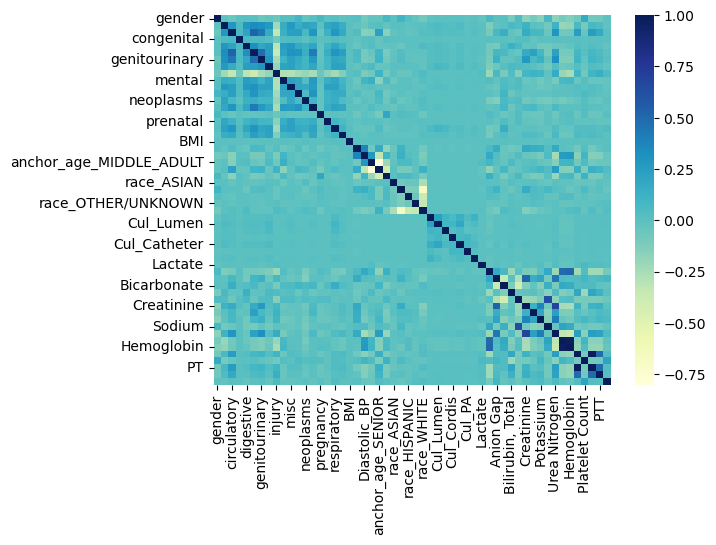

In [130]:
import seaborn as sns

corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [139]:
import xgboost as xgb
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from sklearn.metrics import accuracy_score, roc_auc_score
#Find the important features

In [140]:
xgb_model = xgb.XGBClassifier()

# 训练模型
xgb_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = xgb_model.predict(X_test)

# 计算模型的准确率和AUC
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.9549
AUC: 0.5902


In [142]:
importances = xgb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

feature_names = X.columns.tolist()
# Rearrange feature names so they match the sorted feature importances
sorted_names = [feature_names[i] for i in indices]

# Print the feature ranking
print("Feature ranking:")
for i in range(X_train.shape[1]):
    print(f"{i+1}. {sorted_names[i]} ({importances[indices[i]]:.4f})")


Feature ranking:
1. infectious (0.1983)
2. injury (0.1014)
3. respiratory (0.0507)
4. Albumin (0.0257)
5. blood (0.0242)
6. anchor_age_MIDDLE_ADULT (0.0242)
7. race_ASIAN (0.0233)
8. genitourinary (0.0220)
9. White Blood Cells (0.0197)
10. other_culture (0.0170)
11. prenatal (0.0170)
12. misc (0.0168)
13. INR(PT) (0.0160)
14. Cul_PICC (0.0159)
15. congenital (0.0157)
16. Lactate (0.0143)
17. Chloride (0.0139)
18. Potassium (0.0138)
19. digestive (0.0137)
20. anchor_age_SENIOR (0.0134)
21. endocrine (0.0132)
22. gender (0.0132)
23. PTT (0.0124)
24. race_BLACK (0.0124)
25. Bilirubin, Total (0.0123)
26. Systolic_BP (0.0123)
27. Urea Nitrogen (0.0122)
28. PT (0.0120)
29. Bicarbonate (0.0118)
30. muscular (0.0116)
31. Creatinine (0.0114)
32. circulatory (0.0114)
33. mental (0.0114)
34. Hemoglobin (0.0111)
35. Diastolic_BP (0.0111)
36. anchor_age_YOUNG_ADULT (0.0110)
37. neoplasms (0.0109)
38. Glucose (0.0106)
39. Platelet Count (0.0106)
40. Cul_Catheter (0.0105)
41. Anion Gap (0.0104)
42. S

Then let's try backward elimination

In [145]:
!pip install mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.3 MB/s eta 0:00:0000:0100:01m


In [146]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



Note: this model takes a lot of time, I run it in the file: backward_elimination.ipynb. Just copy the code and result here.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 定义一个决策树分类器
clf = DecisionTreeClassifier()

# 定义 SFS 模型，选择最优特征
sfs = SFS(clf,
          k_features='best',
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=2)

# 拟合 SFS 模型并进行 backward elimination 特征选择
sfs = sfs.fit(X, y)

# 打印特征选择结果
print('Selected features:', sfs.k_feature_idx_)

# 仅选择最优特征的数据集
X_opt = sfs.transform(X)


Selected features: (7, 16)

In [ ]:
selected_feature_indices = sfs.k_feature_idx_
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
print("Selected features:", selected_feature_names)


Selected features: ['infectious', 'respiratory']

There are only two features selected in this selection, which I think maybe too few for construction of the model. But we can see these two features also takes important places in feature importances.

In [156]:
#choose the 15 most important features in X
top_features = sorted_names[:15]


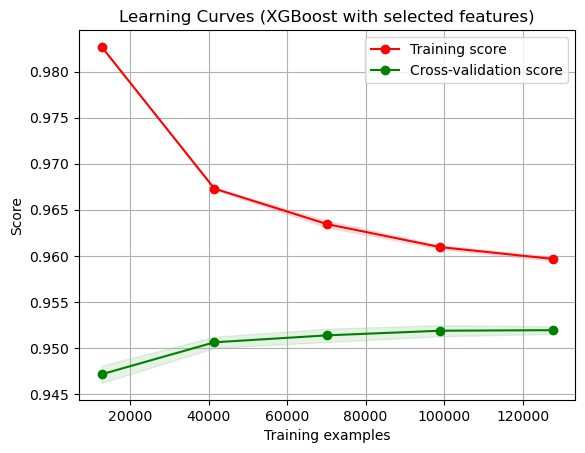

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 定义一个绘制学习曲线的函数
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt


# 使用选择的特征重新训练模型，并绘制学习曲线
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]
xgb_model_selected = XGBClassifier()
title = "Learning Curves (XGBoost with selected features)"
cv = 5
plot_learning_curve(xgb_model_selected, title, X_train_selected, y_train, cv=cv)
plt.show()


In [162]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 使用选择的特征重新训练模型
xgb_model_selected.fit(X_train_selected, y_train)

# 在测试集上进行预测
y_pred_selected = xgb_model_selected.predict(X_test_selected)
y_pred_proba_selected = xgb_model_selected.predict_proba(X_test_selected)[:, 1]

# 计算AUC和准确性两个性能指标
auc_selected = roc_auc_score(y_test, y_pred_proba_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

# 输出AUC和准确性
print(f"AUC on test set: {auc_selected:.3f}")
print(f"Accuracy on test set: {accuracy_selected:.3f}")


AUC on test set: 0.901
Accuracy on test set: 0.954


In [178]:
from sklearn.metrics import classification_report

y_train_pred_selected = xgb_model_selected.predict(X_train_selected)

# 计算分类指标
report_test = classification_report(y_test, y_pred_selected)

print("Report for test set: ", report_test)

report_train = classification_report(y_train, y_train_pred_selected)

print("Report for train set: ", report_train)


Report for test set:                precision    recall  f1-score   support

           0       0.96      0.99      0.98     37987
           1       0.58      0.14      0.23      1896

    accuracy                           0.95     39883
   macro avg       0.77      0.57      0.60     39883
weighted avg       0.94      0.95      0.94     39883

Report for train set:                precision    recall  f1-score   support

           0       0.96      1.00      0.98    151655
           1       0.82      0.22      0.34      7873

    accuracy                           0.96    159528
   macro avg       0.89      0.61      0.66    159528
weighted avg       0.95      0.96      0.95    159528



In [170]:
def calc_accuracy(y_actual, y_pred, thresh):
    # this function calculates the accuracy with probability threshold at thresh
    return (sum((y_pred > thresh) & (y_actual == 1))+sum((y_pred < thresh) & (y_actual == 0))) /len(y_actual)

def calc_recall(y_actual, y_pred, thresh):
    # calculates the recall
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_actual)

def calc_precision(y_actual, y_pred, thresh):
    # calculates the precision
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)

In [173]:
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159528 entries, 65730 to 169573
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   infectious               159528 non-null  int64  
 1   injury                   159528 non-null  int64  
 2   respiratory              159528 non-null  int64  
 3   Albumin                  159528 non-null  float64
 4   blood                    159528 non-null  int64  
 5   anchor_age_MIDDLE_ADULT  159528 non-null  int64  
 6   race_ASIAN               159528 non-null  int64  
 7   genitourinary            159528 non-null  int64  
 8   White Blood Cells        159528 non-null  float64
 9   other_culture            159528 non-null  int64  
 10  prenatal                 159528 non-null  int64  
 11  misc                     159528 non-null  int64  
 12  INR(PT)                  159528 non-null  float64
 13  Cul_PICC                 159528 non-null  int64  
 14  

Train AUC:0.933
Test AUC:0.901
Train accuracy:0.959
Test accuracy:0.954
Train recall:0.218
Test recall:0.140
Train precision:0.824
Test precision:0.579


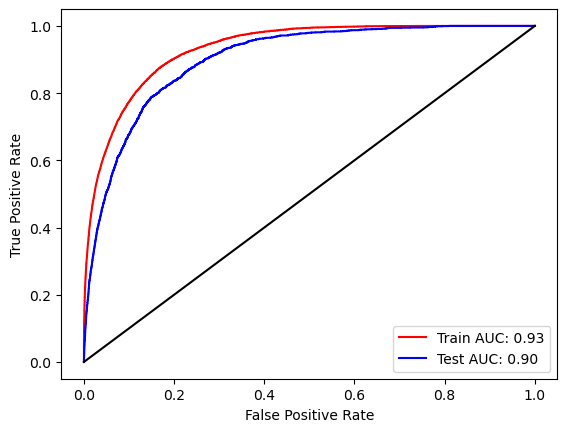

In [183]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_train_preds = xgb_model_selected.predict_proba(X_train_selected)[:, 1]
y_test_preds = xgb_model_selected.predict_proba(X_test_selected)[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

print('Train AUC:%.3f' % auc_train)
print('Test AUC:%.3f' % auc_test)

print('Train accuracy:%.3f' % calc_accuracy(y_train, y_train_preds, thresh))
print('Test accuracy:%.3f' % calc_accuracy(y_test, y_test_preds, thresh))

print('Train recall:%.3f' % calc_recall(y_train, y_train_preds, thresh))
print('Test recall:%.3f' % calc_recall(y_test, y_test_preds, thresh))

print('Train precision:%.3f' % calc_precision(y_train, y_train_preds, thresh))
print('Test precision:%.3f' % calc_precision(y_test, y_test_preds, thresh))

plt.plot(fpr_train, tpr_train, 'r-', label='Train AUC: %.2f' % auc_train)
plt.plot(fpr_test, tpr_test, 'b-', label='Test AUC: %.2f' % auc_test)
plt.plot([0, 1], [0, 1], '-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


From the classification report, we can see that the model has a high accuracy (0.95) and precision (0.96) for the negative class, but a very low recall (0.14) and precision (0.58) for the positive class. This means that the model is good at predicting negative cases, but is not very effective at identifying positive cases, which is the class of interest.